In [109]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
bitcoin_df= pd.read_csv("bitcoin_dataset.csv")
bitcoin_df['Date'] =  bitcoin_df['Date'].astype(str)
bitcoin_df['Date'] = bitcoin_df['Date'].apply(lambda time: time.split()[0])
bitcoin_df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/23/2010,0.0,2110700.0,0.0,0.0,0.0,0.000216,0,1.0,0.0,...,25100.000000,0.0,252,252,42613,252,252,12600.0,50.0,0.0
1,2/24/2010,0.0,2120200.0,0.0,0.0,0.0,0.000282,0,1.0,0.0,...,179.245283,0.0,195,196,42809,196,196,14800.0,5300.0,0.0
2,2/25/2010,0.0,2127600.0,0.0,0.0,0.0,0.000227,0,1.0,0.0,...,1057.142857,0.0,150,150,42959,150,150,8100.0,700.0,0.0
3,2/26/2010,0.0,2136100.0,0.0,0.0,0.0,0.000319,0,1.0,0.0,...,64.582059,0.0,176,176,43135,176,176,29349.0,13162.0,0.0
4,2/27/2010,0.0,2144750.0,0.0,0.0,0.0,0.000223,0,1.0,0.0,...,1922.222222,0.0,176,176,43311,176,176,9101.0,450.0,0.0


In [111]:
price_df = pd.read_csv("coindesk-bpi-USD-close_data-2010-07-17_2018-10-28.csv")
price_df['Date'] = price_df['Date'].astype(str)
price_df['Date'] = price_df['Date'].iloc[:3024].apply(lambda time: time.split()[0])
price_df= price_df[:3024]
price_df.head()

,Date,Close Price
0,7/18/2010,0.09
1,7/19/2010,0.08
2,7/20/2010,0.07
3,7/21/2010,0.08
4,7/22/2010,0.05


In [112]:
trend_df = pd.read_csv("multiTimeline.csv")
trend_df.columns = trend_df.iloc[1]
trend_df =  trend_df.iloc[2:]
trend_df.head()

1,Week,bitcoin: (United States)
2,11/3/2013,4
3,11/10/2013,5
4,11/17/2013,12
5,11/24/2013,12
6,12/1/2013,13


In [113]:
price_df['Date']= pd.to_datetime(price_df['Date'])
trend_df['Week']= pd.to_datetime(trend_df['Week'])
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

In [114]:
df = pd.merge(trend_df, price_df, how='inner', left_on='Week', right_on='Date')
df = pd.merge(df, bitcoin_df, how='inner', left_on='Week', right_on='Date')
df['bitcoin: (United States)'] = df['bitcoin: (United States)'].astype(int)

In [115]:
df

,Week,bitcoin: (United States),Date_x,Close Price,Date_y,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2013-11-03,4,2013-11-03,207.63,2013-11-03,206.850000,11943650.0,2.470544e+09,8.946807e+06,11579.0000,...,4.449443,28.438626,63309,35815,26429798,30351,24107,5.383280e+05,110666.00000,2.289117e+07
1,2013-11-10,5,2013-11-10,311.90,2013-11-10,296.910000,11971875.0,3.554569e+09,3.715924e+07,11778.0000,...,1.885839,22.082970,97886,57169,26811626,44438,35493,7.710570e+05,225470.00000,6.694428e+07
2,2013-11-17,12,2013-11-17,476.29,2013-11-17,463.000000,12004200.0,5.557945e+09,7.445084e+07,11973.0000,...,2.817139,46.645990,86411,48041,27219756,40401,29858,1.032920e+06,171805.00000,7.954594e+07
3,2013-11-24,12,2013-11-24,751.38,2013-11-24,833.160000,12032450.0,1.002496e+10,4.226853e+07,12244.0000,...,1.905109,59.927884,103353,60018,27747091,49377,33043,1.415957e+06,226601.00000,1.887950e+08
4,2013-12-01,13,2013-12-01,946.92,2013-12-01,970.000000,12063250.0,1.170135e+10,2.037165e+08,12518.0000,...,2.606451,70.639970,125448,67175,28330714,61331,40815,1.459358e+06,187688.00000,1.820575e+08
5,2013-12-08,10,2013-12-08,795.40,2013-12-08,722.990000,12095325.0,8.744799e+09,1.114293e+08,12766.0000,...,2.349250,66.265017,95996,49174,28843549,44771,32641,1.409375e+06,191848.00000,1.387045e+08
6,2013-12-15,10,2013-12-15,879.47,2013-12-15,848.170000,12126925.0,1.028569e+10,3.312949e+07,12984.0000,...,3.994864,72.924475,103782,51885,29264340,47577,33684,4.798773e+05,111668.00000,9.471377e+07
7,2013-12-22,7,2013-12-22,617.82,2013-12-22,637.000000,12160600.0,7.746302e+09,3.005413e+07,13215.0000,...,2.699234,51.424190,98559,51543,29729646,42186,28150,7.547024e+05,154155.00000,9.819664e+07
8,2013-12-29,5,2013-12-29,745.07,2013-12-29,714.790000,12189725.0,8.713094e+09,2.311840e+07,13406.0000,...,6.044122,54.829092,93084,49031,30096181,39438,28307,7.440453e+05,62226.00000,4.447834e+07
9,2014-01-05,6,2014-01-05,940.10,2014-01-05,896.000000,12219725.0,1.094887e+10,9.466299e+07,13602.0000,...,3.022660,72.517494,106688,55761,30468524,48192,31785,8.479763e+05,149306.00000,1.337778e+08


In [116]:
df.drop(['Date_x', 'Date_y'], axis=1, inplace=True)

In [117]:
df.dropna(inplace=True)

In [118]:
X= df.drop(['Week', 'Close Price', 'btc_market_price'], axis=1)
y = df['btc_market_price']

In [119]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [121]:
regress = LinearRegression()
regress.fit(X_train, y_train)

predict= regress.predict(X_test)

print('r2 is ', r2_score(y_test, predict))
print('mean absolute error is ', mean_absolute_error(y_test, predict))

r2 is  0.9999798291909515
mean absolute error is  10.561083387548486


Text(0,0.5,'Bitcoin price')

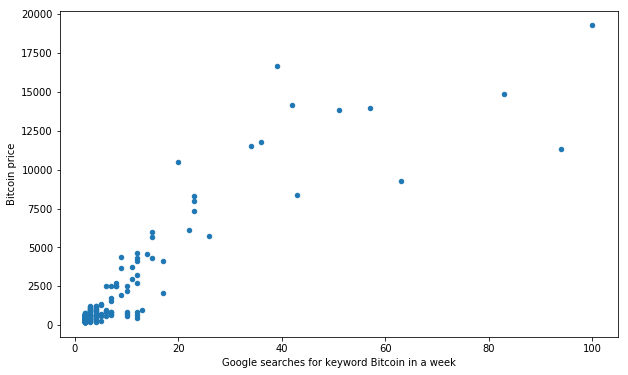

In [131]:
plt.figure(figsize=(10,6))

plt.scatter(df['bitcoin: (United States)'], df['btc_market_price'], s= 20)
plt.xlabel("Google searches for keyword {} in a week".format('Bitcoin'))
plt.ylabel("Bitcoin price")

Text(0.5,0,'Date')

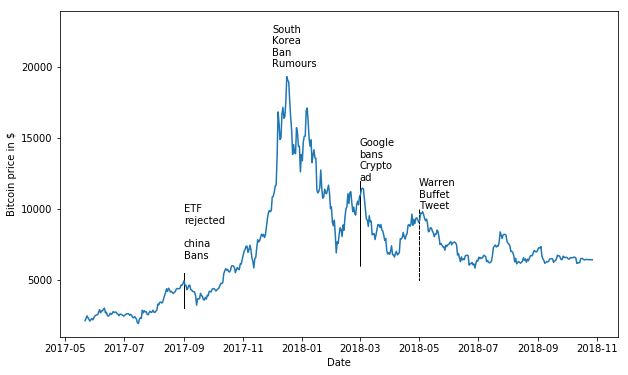

In [234]:
plt.figure(figsize=(10,6))

plt.plot(price_df.iloc[2500:]['Date'], price_df.iloc[2500:]['Close Price'])
plt.ylim((1000,24000))
#plt.arrow('2018-05', 15000, dx=0, dy=-10000, linestyle= '--')
plt.text('2018-05', 10000,s='Warren\nBuffet\nTweet')
plt.arrow('2018-05', 5000, 0, +5000, linestyle= '--')
plt.text('2018-03', 12000,s='Google\nbans\nCrypto\nad')
plt.arrow('2018-03', 6000, 0, +6000, linestyle= '--')
plt.text('2017-09',6500,s='ETF\nrejected\n\nchina\nBans')
plt.arrow('2017-09', 3000, 0, 2500, linestyle= '--')
plt.text('2017-12',20000,s='South\nKorea\nBan\nRumours')
plt.ylabel("Bitcoin price in $")
plt.xlabel("Date")